# Задание 1

Исходные данные:

In [1]:
import pandas

datas= pandas.read_csv('Davis.csv', index_col=0)
pandas.get_dummies(datas, columns=['sex'])

,weight,height,repwt,repht,sex_F,sex_M
1,77,182,77.0,180.0,0,1
2,58,161,51.0,159.0,1,0
3,53,161,54.0,158.0,1,0
4,68,177,70.0,175.0,0,1
5,59,157,59.0,155.0,1,0
...,...,...,...,...,...,...
196,74,175,71.0,175.0,0,1
197,83,180,80.0,180.0,0,1
198,81,175,NaN,NaN,0,1
199,90,181,91.0,178.0,0,1


# Разделить датасет на 2 выборки (train, test) из 100 человек, с сохранением пропорции полов

Вычислим пропорцию полов в исходном датасете и полученных выборках:

In [2]:
def count_rel(df):
    man = (df["sex_F"] <= 0).sum()
    women=(df["sex_M"] <= 0).sum()
    return man/(women+man)
df=pandas.get_dummies(datas, columns=['sex'])
print(count_rel(df))


0.44


In [3]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.5, stratify=df['sex_M'])
print(count_rel(train))
print(count_rel(test))

0.44
0.44


# Очистить выборки от выбросов - людей с нереалистичным ростом /весом

Посмотрим, в каких столбцах встречаются NaN значения

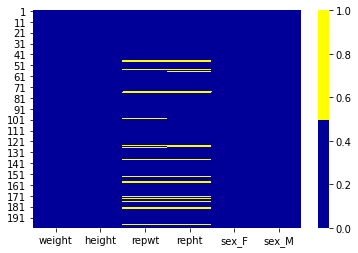

In [4]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Посмотрим описание значений столбцов

In [5]:
df[cols].describe()

,weight,height,repwt,repht,sex_F,sex_M
count,200.000000,200.000000,183.000000,183.000000,200.000000,200.000000
mean,65.800000,170.020000,65.622951,168.497268,0.560000,0.440000
std,15.095009,12.007937,13.776669,9.467048,0.497633,0.497633
min,39.000000,57.000000,41.000000,148.000000,0.000000,0.000000
25%,55.000000,164.000000,55.000000,160.500000,0.000000,0.000000
50%,63.000000,169.500000,63.000000,168.000000,1.000000,0.000000
75%,74.000000,177.250000,73.500000,175.000000,1.000000,1.000000
max,166.000000,197.000000,124.000000,200.000000,1.000000,1.000000


Построим столбчатые диаграммы каждого столбца, чтобы понять, какие значения являются неадекватными относительно других

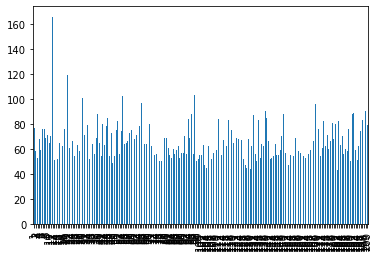

In [6]:
df['weight'].plot.bar()

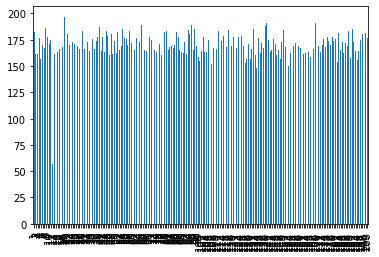

In [7]:
df['height'].plot.bar()

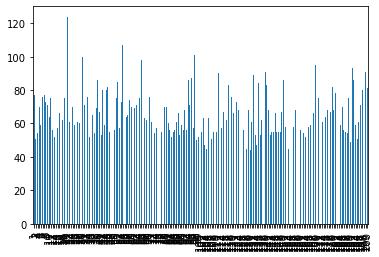

In [8]:
df['repwt'].plot.bar()

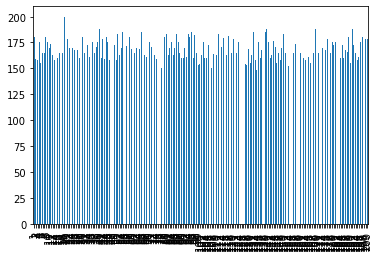

In [9]:
df['repht'].plot.bar()

Построим точечные графики зависимости роста от веса у мужчин и женщин, чтобы выявить неадекватные значения

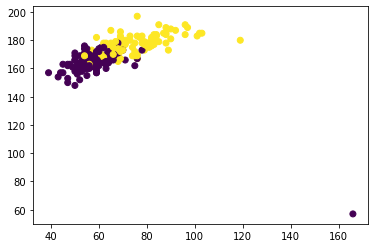

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df["weight"],df['height'], c= df['sex_M'])

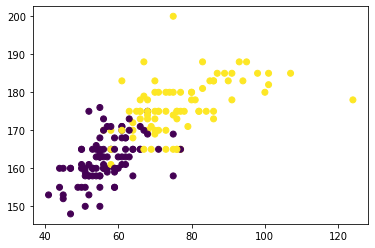

In [11]:
plt.scatter(df['repwt'], df['repht'], c= df['sex_M'])

Очистим train/test от вбросов и неопределенных значений

In [12]:
from scipy import stats
import numpy as np
train=train.dropna(axis=0)
train=train[(np.abs(stats.zscore(train)) < 2).all(axis=1)]
train

,weight,height,repwt,repht,sex_F,sex_M
95,88,189,87.0,185.0,0,1
20,61,175,61.0,171.0,1,0
63,71,180,76.0,175.0,0,1
25,54,171,59.0,168.0,1,0
195,62,164,61.0,161.0,1,0
...,...,...,...,...,...,...
128,45,157,45.0,153.0,1,0
178,66,170,67.0,165.0,0,1
141,66,175,68.0,175.0,0,1
42,80,178,80.0,178.0,0,1


In [13]:
test=test.dropna(axis=0)
test=test[(np.abs(stats.zscore(test)) < 2).all(axis=1)]
test

,weight,height,repwt,repht,sex_F,sex_M
33,79,173,76.0,173.0,0,1
86,59,182,61.0,183.0,0,1
150,88,184,86.0,183.0,0,1
26,50,166,50.0,165.0,1,0
193,59,164,59.0,165.0,1,0
...,...,...,...,...,...,...
82,55,168,56.0,170.0,0,1
16,65,166,66.0,165.0,1,0
5,59,157,59.0,155.0,1,0
9,71,178,71.0,175.0,0,1


# Отобразить train-выборку в виде точек на графике

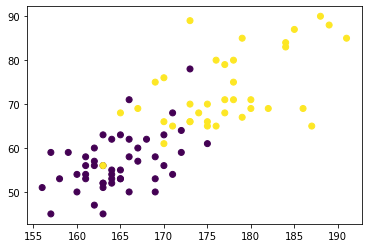

In [14]:
plt.scatter(train['height'], train['weight'], c= train['sex_M'])

# Построить гистограммы:

Роста и веса в целом

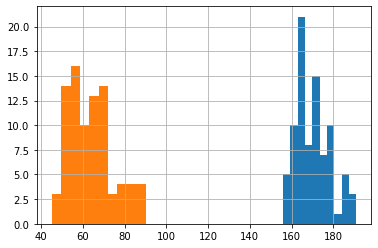

In [15]:
train['height'].hist()
train["weight"].hist()

Роста и веса мужчин

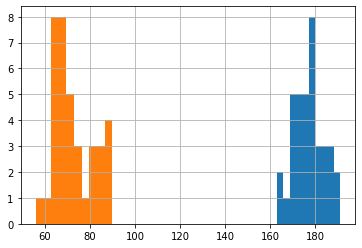

In [16]:
train_man= train.loc[train['sex_M'] ==1]
train_man['height'].hist()
train_man["weight"].hist()

Роста и веса женщин

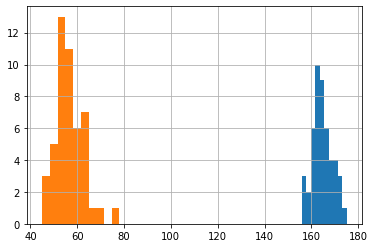

In [17]:
train_woman= train.loc[train['sex_M'] !=1]
train_woman['height'].hist()
train_woman["weight"].hist()

Величины (repwt - weight) в целом

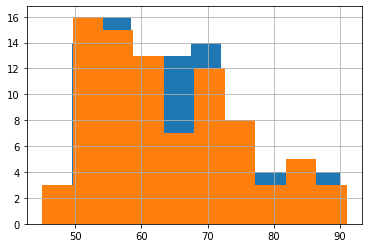

In [18]:
train["weight"].hist()
train['repwt'].hist()

Величины (repwt - weight) мужчин

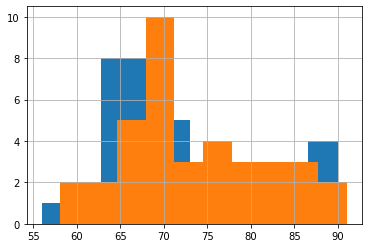

In [19]:
train_man["weight"].hist()
train_man['repwt'].hist()

Величины (repwt - weight) женщин

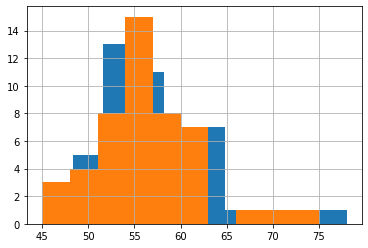

In [20]:
train_woman["weight"].hist()
train_woman['repwt'].hist()

Величины (repht - height) в целом

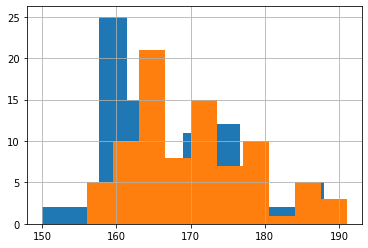

In [21]:
train['repht'].hist()
train["height"].hist()

Величины (repht - height) мужчин

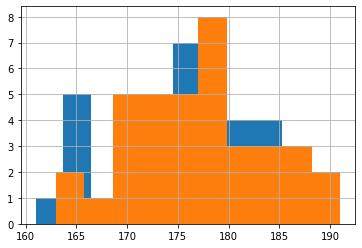

In [22]:
train_man['repht'].hist()
train_man["height"].hist()

Величины (repht - height) женщин

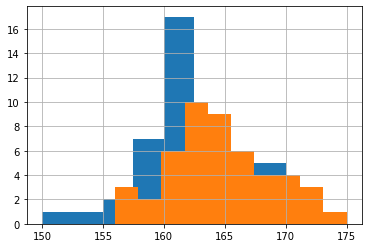

In [23]:
train_woman['repht'].hist()
train_woman["height"].hist()

# Построить генератор данных (sex, height, weight) 

Обращаемся к функции вычисления вероятности пола. Из дискретного распределения с определенной вероятностью выбирается пол.

In [24]:
sex_W_arr=np.random.choice([0,1],100, p=[count_rel(df), 1-count_rel(df)])
sex_M_arr=np.abs(sex_W_arr-1)
print(sex_W_arr)
print("___________________________________________________________________________")
print(sex_M_arr)

[1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0]
___________________________________________________________________________
[0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0
 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1]


Разбиваем датасет на М и Ж, чтобы генерировать данные в дальнейшем в зависимости от пола

In [25]:
for_generation_woman=train_woman.drop(['repwt', 'repht','sex_M'], axis='columns')
for_generation_woman[:5]

,weight,height,sex_F
20,61,175,1
25,54,171,1
195,62,164,1
162,54,161,1
28,58,166,1


In [26]:
for_generation_man=train_man.drop(['repwt', 'repht','sex_F'], axis='columns')
for_generation_man[:5]

,weight,height,sex_M
95,88,189,1
63,71,180,1
114,67,179,1
79,69,182,1
180,68,174,1


In [27]:
def getDisp(df):
    std_=df.std().values.astype(np.float)
    print("Дисперсия: ", std_[0]**2)
    return std_[0]**2
def getMean(df):
    mean_= df.mean().values.astype(np.float)
    return mean_[0]
def getCov(df_h,df_w):
    mean_h=getMean(df_h)
    print("Cреднее значение роста: ", mean_h)
    mean_w= getMean(df_w)
    print("Cреднее значение веса: ", mean_w)
    cov_=np.mean((df_h['height']-mean_h)*(df_w['weight']-mean_w))
    print("Ковариация: ", cov_)
    return cov_

Используя функции нахождения std^2 и mean найдем ковариционную матрицу распределения для женщин

Найдем дисперсию роста,веса и их средние значения

In [28]:
D_h_w=getDisp(for_generation_woman.drop(['weight','sex_F'], axis='columns'))
D_w_w=getDisp(for_generation_woman.drop(['height','sex_F'], axis='columns'))
mean_h_w=getMean(for_generation_woman.drop(['weight','sex_F'], axis='columns'))
mean_w_w=getMean(for_generation_woman.drop(['height','sex_F'], axis='columns'))



Дисперсия:  19.588652482269513
Дисперсия:  39.48537234042552


С помощью функции нахождения ковариации, найдем ее

In [29]:
cov_women=getCov(for_generation_woman.drop(['weight','sex_F'], axis='columns'),for_generation_woman.drop(['height','sex_F'], axis='columns'))


Cреднее значение роста:  164.66666666666666
Cреднее значение веса:  56.5625
Ковариация:  13.29166666666667


Сгенерируем данные для женщин по данной модели

In [30]:
X_woman= np.random.multivariate_normal([mean_h_w, mean_w_w], [[D_h_w, cov_women],[cov_women,D_w_w]],size=100)

In [31]:
X_woman[:5]

array([[166.36535983,  65.51043084],
       [169.08035093,  53.00543936],
       [172.85495951,  66.23814231],
       [155.11381538,  47.42202909],
       [164.24305494,  56.43255724]])

Аналогично, используя функции нахождения std^2 и mean найдем ковариционную матрицу распределения для мужчин

In [32]:
D_h_m=getDisp(for_generation_man.drop(['weight','sex_M'], axis='columns'))
D_w_m=getDisp(for_generation_man.drop(['height','sex_M'], axis='columns'))
mean_h_m=getMean(for_generation_man.drop(['weight','sex_M'], axis='columns'))
mean_w_m=getMean(for_generation_man.drop(['height','sex_M'], axis='columns'))
cov_men=getCov(for_generation_man.drop(['weight','sex_M'], axis='columns'),for_generation_man.drop(['height','sex_M'], axis='columns'))
X_man= np.random.multivariate_normal([mean_h_m, mean_w_m], [[D_h_m, cov_men],[cov_men,D_w_m]],size=100)


Дисперсия:  45.33033033033034
Дисперсия:  75.4324324324324
Cреднее значение роста:  176.94594594594594
Cреднее значение веса:  72.89189189189189
Ковариация:  32.345507669831996


In [33]:
X_man[:5]

array([[184.34550844,  89.35587   ],
       [176.90644713,  78.20527966],
       [181.19367122,  90.15864806],
       [178.02367885,  74.35710665],
       [165.80369455,  57.89728954]])

Соберем все данные в новый сгенерированный датасет

In [34]:
data={}
heights_all=[]
weights_all=[]


for i in range(100):
    if sex_W_arr[i]==1:
        need= X_woman[i]
    else:
         need= X_man[i]
    heights_all.append(need[0])
    weights_all.append(need[1])    
    
data['height']=heights_all
data['weight']=weights_all   
data["sex_F"]=sex_W_arr
data["sex_M"]=sex_M_arr  
generated_df=pandas.DataFrame(data)


In [35]:
generated_df

,height,weight,sex_F,sex_M
0,166.365360,65.510431,1,0
1,176.906447,78.205280,0,1
2,181.193671,90.158648,0,1
3,178.023679,74.357107,0,1
4,164.243055,56.432557,1,0
...,...,...,...,...
95,167.950704,63.244380,1,0
96,173.404308,62.421448,1,0
97,160.636181,53.620838,1,0
98,173.335900,75.465930,0,1


Построим точечный график для получившейся зависимости веса от роста у мужчин

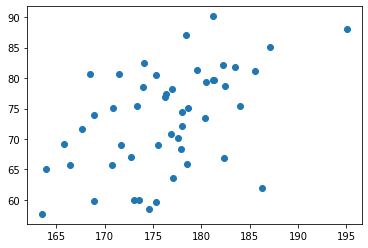

In [36]:
gen_man= generated_df.loc[generated_df['sex_M'] ==1]
plt.scatter(gen_man['height'],gen_man["weight"])


Построим точечный график для получившейся зависимости веса от роста у женщин

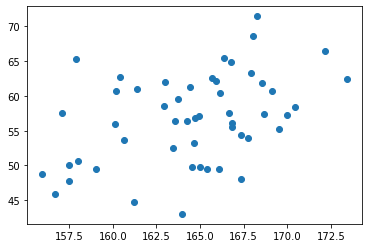

In [37]:
gen_woman= generated_df.loc[generated_df['sex_M'] !=1]
plt.scatter(gen_woman['height'],gen_woman["weight"])

Вычислить правдоподобие данных для женщин

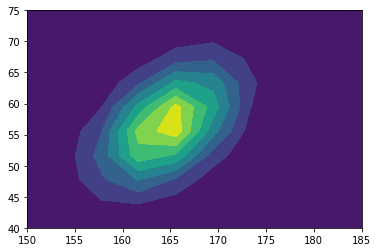

In [38]:
import scipy.stats
xw,yw = np.mgrid[150:185:10j, 40:75:10j]
matrix = np.column_stack((xw.ravel(), yw.ravel()))
pdf = scipy.stats.multivariate_normal.pdf(matrix,mean=[mean_h_w, mean_w_w],cov=[[D_h_w, cov_women],[cov_women,D_w_w]])
plt.contourf(xw, yw, pdf.reshape(xw.shape))

Вычислить правдоподобие данных для мужчин

(100,)


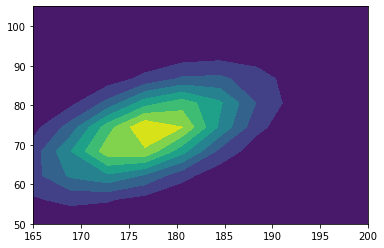

In [39]:
xm,ym = np.mgrid[165:200:10j, 50:105:10j]
matrix_m = np.column_stack((xm.ravel(), ym.ravel()))
pdf = scipy.stats.multivariate_normal.pdf(matrix_m,mean=[mean_h_m, mean_w_m],cov=[[D_h_m, cov_men],[cov_men,D_w_m]])
print(pdf.shape)
plt.contourf(xm, ym, pdf.reshape(xm.shape))

# Задание 2

Для начала обучим модель LinearRegression предсказывать вес по росту

In [40]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
reg_h_train=train[["height"]].values.astype(np.float)
reg_w_train=train['weight'].values.astype(np.float)

lreg.fit(reg_h_train, reg_w_train)

LinearRegression()

In [41]:
lreg_pred=lreg.predict(test[["height"]])

Графически изобразим предсказание, которое дала модель

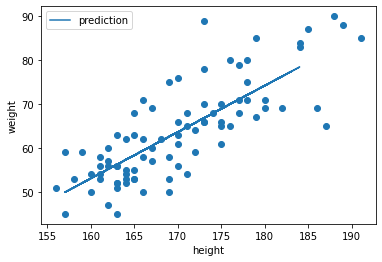

In [42]:
plt.scatter(train["height"], train['weight'])
plt.plot(test["height"], lreg_pred, label="prediction")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

Визуализируем минимизируемый критерий

In [43]:
def get_error(w_,predict_w,len_):
    err=[]
    for i in range(len_):
        err.append(1/len_*((w_[i]-predict_w[i])**2))
    return(err)

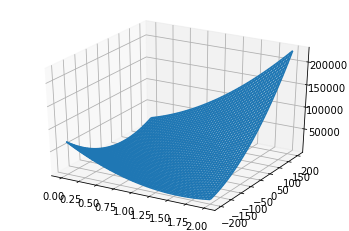

In [44]:
errs=get_error(test['weight'].values.astype(np.float),lreg_pred, len(lreg_pred ))
ww,bb = np.mgrid[0:2:200j, -200:200:200j]
err = []
h_ = train['height'].values.astype(np.float)
w_ = train['weight'].values.astype(np.float)
for w, b in zip(ww.ravel(),bb.ravel()):
    err.append(1/len(h_) * np.sum((w_ - w * h_ - b)**2))
err = np.array(err)
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, err.reshape(ww.shape))

В виде контура

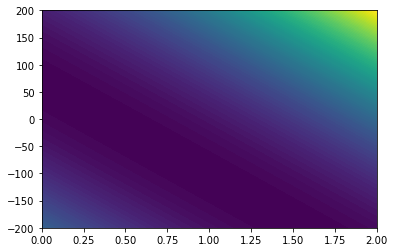

In [45]:
plt.contourf(ww,bb,err.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

Обучим модель предсказывать вес по формуле weight=w1∗height+w2∗[sex=M]+b 

In [46]:
new_train_df=train.drop(["sex_F", "repwt", "repht"], axis='columns')
new_train_df

,weight,height,sex_M
95,88,189,1
20,61,175,0
63,71,180,1
25,54,171,0
195,62,164,0
...,...,...,...
128,45,157,0
178,66,170,1
141,66,175,1
42,80,178,1


In [47]:
lr_new= LinearRegression()
lr_new.fit(new_train_df.drop(["weight"], axis=1).values.astype(np.float), new_train_df["weight"].values.astype(np.float))

LinearRegression()

In [48]:
new_test_df=test.drop(["sex_F","repwt","repht"], axis='columns')
lr_pred_new=lr_new.predict(new_test_df.drop(["weight"], axis=1).values.astype(np.float))

Проверим среднекв ошибку

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(new_test_df['weight'], lr_pred_new)

56.21350432369419

# Обучить градиентным спуском линейную модель

Получим необходимую тестовую выборку

In [50]:
gr_train_df=train.drop(["sex_F","sex_M","repwt","repht"], axis='columns')

Изменим масштаб данных, чтобы не застревать в плато функции

In [51]:
gr_train_df_scale = (gr_train_df - gr_train_df.mean()) / gr_train_df.std()

Визуализируем минимизируемый критерий

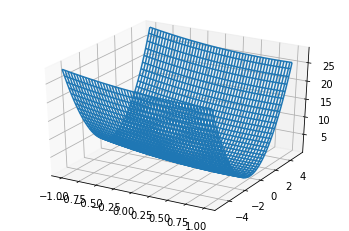

In [52]:
ww,bb = np.mgrid[-1:1:200j, -5:5:200j]
L = []
for w, b in zip(ww.ravel(),bb.ravel()):
    L.append(1/len(gr_train_df_scale['height'].values) * np.sum((gr_train_df_scale['weight'].values - w * gr_train_df_scale['height'].values - b)**2))
L = np.array(L)
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, L.reshape(ww.shape))

В виде контура:

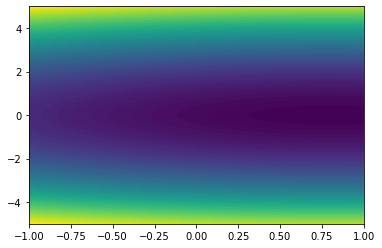

In [53]:
plt.contourf(ww,bb,L.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

Применим метод градиентного спуска и найдем оптимальные параметры w и b

In [54]:
w = 1
b = 1
alpha = 0.002

x = gr_train_df_scale['height'].values
y = gr_train_df_scale['weight'].values
N = len(x)
E = 2



for i in range(9300):
    min_ = (1/N * np.sum((y - w * x - b)**2))
    d_yh = (w * x + b - y)
    d_w = np.mean(d_yh * x)
    d_b = np.mean(d_yh)
    norm = np.sqrt(d_w**2 + d_b**2)
    
    if norm > E:
        small_n = norm / E
        d_w = d_w/ small_n
        d_b = d_b / small_n
    w = w - alpha * d_w
    b = b - alpha * d_b
print("w= {} , b = {}".format(w,b))
print("min = {}".format( min_))

w= 0.7920982380634951 , b = 8.20415606163185e-09
min = 0.3681970859786316


Проверим правильно ли был найден коэффициент w

In [55]:
gr_lr = LinearRegression().fit(gr_train_df_scale['height'].values.reshape(-1,1),gr_train_df_scale['weight'].values)
gr_lr.coef_[0]

0.7920982359396876